In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

url = '/content/school-shootings-data.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,uid,nces_school_id,school_name,nces_district_id,district_name,date,school_year,year,time,day_of_week,...,lat,long,staffing,low_grade,high_grade,lunch,county,state_fips,county_fips,ulocale
0,1,080480000707,Columbine High School,804800.0,Jefferson County R-1,4/20/1999,1998-1999,1999,11:19 AM,Tuesday,...,39.603910,-105.075000,89.6,9,12,41,Jefferson County,8,8059,21.0
1,2,220054000422,Scotlandville Middle School,2200540.0,East Baton Rouge Parish School Board,4/22/1999,1998-1999,1999,12:30 PM,Thursday,...,30.529958,-91.169966,39.0,6,8,495,East Baton Rouge Parish,22,22033,12.0
2,3,130441001591,Heritage High School,1304410.0,Rockdale County,5/20/1999,1998-1999,1999,8:03 AM,Thursday,...,33.626922,-84.047960,84.0,9,12,125,Rockdale County,13,13247,21.0
3,4,421899003847,John Bartram High School,4218990.0,Philadelphia City SD,10/4/1999,1999-2000,1999,10:00 AM,Monday,...,39.921509,-75.234108,41.0,9,12,2007,Philadelphia County,42,42101,11.0
4,5,250279000225,Dorchester High School,2502790.0,Boston,11/3/1999,1999-2000,1999,7:40 AM,Wednesday,...,42.285268,-71.075901,NaN,9,12,543,Suffolk County,25,25025,11.0


**Pearson's Corelation**



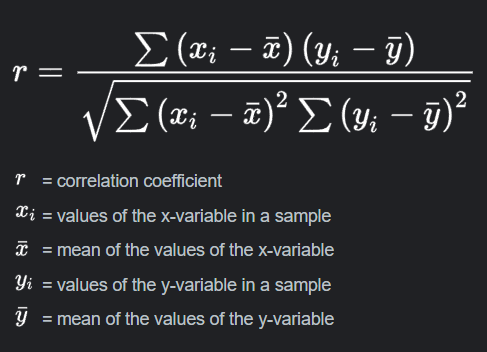

In [ ]:
# Separate the target variable
data= df.copy()

# Calculate Pearson's correlation coefficients
correlation_matrix = np.abs(data.corr())

# Set a correlation threshold
correlation_threshold = 0.5

# Select features with correlation above the threshold to 'injured'
selected_features = correlation_matrix['injured'][correlation_matrix['injured'] > correlation_threshold]

# Filter the dataset to keep only the selected features
filtered = data[selected_features.index]

# Print the selected features
print("Selected Features:")
print(selected_features.index)

Selected Features:
Index(['killed', 'injured', 'casualties', 'shooter_deceased2'], dtype='object')


<ipython-input-15-7dacef829512>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = np.abs(data.corr())


***INFERENCE :***

killed: This feature has a relatively high positive correlation with the 'injured' column. In other words, as the number of people killed in an incident increases, the number of people injured also tends to increase.

injured: This is the target variable, and it has a perfect correlation of 1.0 with itself since it's being compared to itself. Therefore, it's expected to be included in the selected features.

casualties: This feature also has a relatively high positive correlation with the 'injured' column. It represents the total number of casualties (the sum of killed and injured), so it's naturally correlated with the 'injured' column.

shooter_deceased2: This feature appears to have some positive correlation with the 'injured' column. It suggests that when the second shooter is deceased, there might be a tendency for a higher number of injuries.

In [ ]:
print(df.columns)

Index(['uid', 'nces_school_id', 'school_name', 'nces_district_id',
       'district_name', 'date', 'school_year', 'year', 'time', 'day_of_week',
       'city', 'state', 'school_type', 'enrollment', 'killed', 'injured',
       'casualties', 'shooting_type', 'age_shooter1', 'gender_shooter1',
       'race_ethnicity_shooter1', 'shooter_relationship1', 'shooter_deceased1',
       'deceased_notes1', 'age_shooter2', 'gender_shooter2',
       'race_ethnicity_shooter2', 'shooter_relationship2', 'shooter_deceased2',
       'deceased_notes2', 'white', 'black', 'hispanic', 'asian',
       'american_indian_alaska_native', 'hawaiian_native_pacific_islander',
       'two_or_more', 'resource_officer', 'weapon', 'weapon_source', 'lat',
       'long', 'staffing', 'low_grade', 'high_grade', 'lunch', 'county',
       'state_fips', 'county_fips', 'ulocale'],
      dtype='object')


**ANOVA**

In [ ]:
# Specify the continuous feature and the target variable
continuous_feature = 'injured'
target_variable = 'day_of_week'

# Group data by the target variable
groups = [df[continuous_feature][df[target_variable] == class_label] for class_label in df[target_variable].unique()]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Display ANOVA results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 1.6377330701202242
P-value: 0.16401373236801536


**Inference**


Null Hypothesis (H0): There is no significant difference in the 'injured' variable across different days of the week.

Alternative Hypothesis (H1): There are significant differences in the 'injured' variable across different days of the week.

Since the p-value is greater than the significance level (0.05), we do not have enough evidence to reject the null hypothesis. In other words, there is no statistically significant evidence to conclude that the 'injured' variable varies significantly across different days of the week.

**CHI SQUARED**

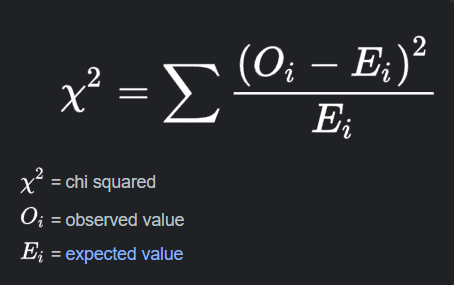

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender_shooter1'], df['shooter_deceased1' ])

# Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the Chi-Squared Test results
print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Contingency Table:")
print(contingency_table)

Chi-Squared Value: 1.2566257272139627
P-value: 0.5334911144358873
Degrees of Freedom: 2
Contingency Table:
shooter_deceased1  0.0  1.0
gender_shooter1            
f                    8    3
h                    1    0
m                  195   36


In [ ]:
df = df[df['gender_shooter1'] != 'h']

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender_shooter1'], df['shooter_deceased1' ])

# Perform the Chi-Squared Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the Chi-Squared Test results
print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Contingency Table:")
print(contingency_table)

Chi-Squared Value: 0.3726279194259488
P-value: 0.5415752999850838
Degrees of Freedom: 1
Contingency Table:
shooter_deceased1  0.0  1.0
gender_shooter1            
f                    8    3
m                  195   36


**Inference**

The Chi-Squared Test results indicate that there is no statistically significant relationship between the variables 'gender_shooter1' and 'shooter_deceased1' in the dataset. The Chi-Squared statistic is 0.3726 with 1 degree of freedom, and the p-value is 0.5416, which is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis, suggesting that these two categorical variables are independent of each other.